In [1]:
%run preamble_2.py
%matplotlib inline

!mkdir -p images tables results

from IPython.display import HTML

In [2]:
#
# Simulated Data
#
DS_NAME ="Simulated Latencies"

N = 1000
batches_sim = [0]*N
for i in range(N):
    batch_size = np.random.geometric(.001)
    batches_sim[i] = [0] * batch_size
    for j in range(batch_size):
        a = np.random.uniform(.5, 5)
        s = np.random.exponential(0.1)
        x = np.random.exponential(0.01)
        batches_sim[i][j] = x + s*np.random.pareto(a)       

DS_DATA = batches_sim
DS_QUANTILES = [0, .25, 0.5, 0.75, .9, .95, .99, .995, .999, .9999, .99999, 1 ]

In [3]:
# Run Configuration

# HDR
CLASSES[3].M = 10**10

# Prom
CLASSES[1].thresholds = np.array([ 0, 1, 10, 100, 1000, 5000, 10000, 50000, 800000, 1000000 ])

METHODS_SEL = [
 'exact',
 'prom',
 'hdr',
 'tdigest',
 'dd',
 'circllhist/type-7',
]
METHODS_RENAME = { 'circllhist/type-7' : "circllhist" }

In [5]:
STATS = evaluate_all(DS_DATA, DS_QUANTILES)

# exact
Insert .........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [6]:
save_results(STATS, DS_NAME)

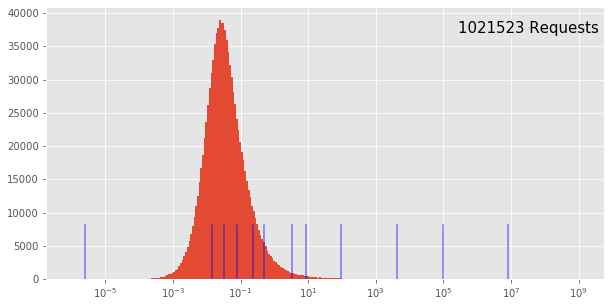

In [7]:
total = np.concatenate(DS_DATA)

xmin=1e-6
xmax=1e9
X = total
plt.figure(figsize=(10,5))
ax = plt.subplot(1,1,1)
ax.hist(X, bins=np.exp(np.linspace(np.log(xmin), np.log(xmax), 300)));
ax.text(0.99, 0.95, '{} Requests'.format(len(X)), horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=15)

Qs = [STATS["exact"]["quantiles"][q] for q in DS_QUANTILES ]
for y in Qs: ax.axvline(y, color="blue", alpha=.5, ymax=0.2)

plt.xscale("log")

plt.savefig("images/dist_" + DS_NAME)